In [1]:
import torch 
print(torch.cuda.get_device_name())

C:\Users\omshi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NVIDIA GeForce RTX 3050 Ti Laptop GPU


# Imports of important libraries

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# load trainig data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<AxesSubplot:ylabel='count'>

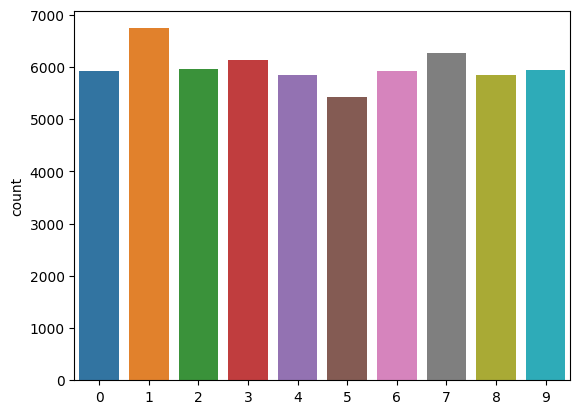

In [4]:
sns.countplot(x=y_train)

# Data formatting

In [5]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

# Categorical Distibution

In [6]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


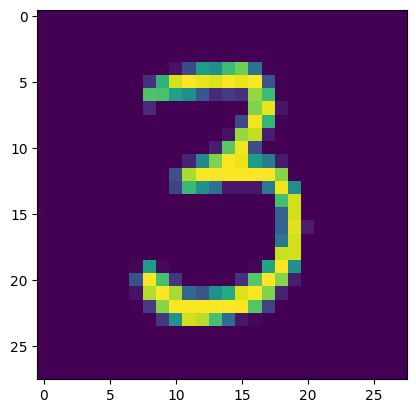

In [7]:
plt.imshow(x_train[50][:,:,0])
print(y_train[50])

# Model
Here we have model with convolutional neural network with dropout and pooling layers</br>


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu', input_shape=(28, 28, 1),),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model Training

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=2,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/2
54000/54000 [==============================] - 359s 7ms/step - loss: 0.2410 - acc: 0.9319 - val_loss: 0.0910 - val_acc: 0.9793
Epoch 2/2
54000/54000 [==============================] - 352s 7ms/step - loss: 0.1931 - acc: 0.9521 - val_loss: 0.0700 - val_acc: 0.9820


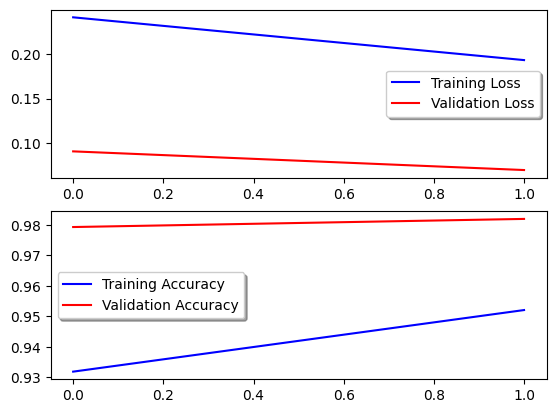

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0798 - acc: 0.9777


In [13]:
Y_pred = model.predict(x_test) 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

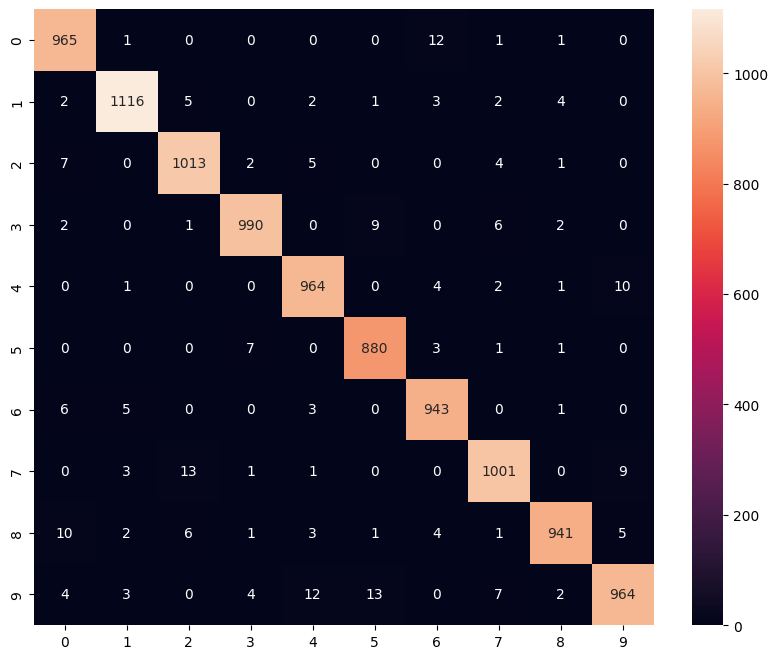

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')